<a href="https://colab.research.google.com/github/nithin-sudarsan/langChain-FAAFO/blob/main/LLMInvoker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a simple LLM application with LangChain

## Translate from english to another language
- Single LLM call
- Prompting

## 1. Install Langchain

In [ ]:
pip install langchain

LangSmith is a tool used to monitor what's doing on inside the chains or agents

In [ ]:
import getpass
import os

try:
  from dotenv import load_dotenv

  load_dotenv()
except ImportError:
  pass

os.environ["LANGSMITH_TRACKING"] = "true"
if "LANGSMITH_API_KEY" not in os.environ:
  os.environ["LANGSMITH_API_KEY"] = getpass.getpass(
      prompt="Enter your LangSmith API key (optional): "
      )

if "LANGSMITH_PROJECT" not in os.environ:
  os.environ["LANGSMITH_PROJECT"] = getpass.getpass(
      prompt='Enter your LangSmith Project name (default = "default"): '
      )
  if not os.environ.get("LANGSMITH_PROJECT"):
    os.environ["LANGSMITH_PROJECT"] = "default"

if "ANTHROPIC_API_KEY" not in os.environ:
  os.environ["ANTHROPIC_API_KEY"] = getpass.getpass(
      prompt="Enter your Anthropic API key (required if using OpenAI): "
      )

Enter your LangSmith API key (optional): ··········
Enter your LangSmith Project name (default = "default"): ··········
Enter your Anthropic API key (required if using Anthropic): ··········


In [ ]:
pip install -qU "langchain[anthropic]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.1/420.1 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 18.2 MB/s eta 0:00:00


In [ ]:
from langchain.chat_models import init_chat_model
model = init_chat_model("claude-3-5-sonnet-latest", model_provider="anthropic")

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("Translate the following from English to Italian"),
    HumanMessage("Hi!")
]

model.invoke(messages)

AIMessage(content='Ciao!', additional_kwargs={}, response_metadata={'id': 'msg_01XUdGseChcbTCWUfCLbt4mk', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 17, 'output_tokens': 7}, 'model_name': 'claude-3-5-sonnet-20241022'}, id='run-f5cfd67a-cae7-493d-9c87-3dc46c85deaf-0', usage_metadata={'input_tokens': 17, 'output_tokens': 7, 'total_tokens': 24, 'input_token_details': {'cache_read': 0, 'cache_creation': 0}})

Here,
- `AIMessage` object is a message from the AI
- `HumanMessage` is message from a human (Human to model messages)
- `SystemMessage` is for priming the AI behaviour (input given to influence how the model responds).
  - It helps to set context, tone or focus of the AI's reply
  - Its a way to guide AI' behaviour based on desired outcome

In [ ]:
model.invoke("Hello")

AIMessage(content='Hi! How can I help you today?', additional_kwargs={}, response_metadata={'id': 'msg_01GQZnjmmPKyC3Mc899MMXNB', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 8, 'output_tokens': 12}, 'model_name': 'claude-3-5-sonnet-20241022'}, id='run-c9f9f394-7435-4764-9f47-93f90bab2ad3-0', usage_metadata={'input_tokens': 8, 'output_tokens': 12, 'total_tokens': 20, 'input_token_details': {'cache_read': 0, 'cache_creation': 0}})

In [ ]:
model.invoke([{"role": "user", "content": "Hello, what is your name?"}])

AIMessage(content="I'm Claude, an AI assistant created by Anthropic. I aim to be direct and honest about what I am. How can I help you today?", additional_kwargs={}, response_metadata={'id': 'msg_01TUCH9SJaT4Xcb4piYNYUeA', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 14, 'output_tokens': 35}, 'model_name': 'claude-3-5-sonnet-20241022'}, id='run-525183bc-2fd7-4e9f-810a-ceba41f4739c-0', usage_metadata={'input_tokens': 14, 'output_tokens': 35, 'total_tokens': 49, 'input_token_details': {'cache_read': 0, 'cache_creation': 0}})

In [ ]:
model.invoke([HumanMessage("Hey")])

AIMessage(content='Hi! How can I help you today?', additional_kwargs={}, response_metadata={'id': 'msg_011XbU7wSWSqrUxB29W889Bb', 'model': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 8, 'output_tokens': 12}, 'model_name': 'claude-3-5-sonnet-20241022'}, id='run-a41ed072-df29-471b-9d90-e756b3af2812-0', usage_metadata={'input_tokens': 8, 'output_tokens': 12, 'total_tokens': 20, 'input_token_details': {'cache_read': 0, 'cache_creation': 0}})

In [ ]:
for token in model.stream(messages):
  print(token.content, end="|")

|Ciao!||

In [ ]:
response = model.invoke("Hey, tell me a joke")
response.content

"Here's a classic one:\n\nWhy don't scientists trust atoms?\nBecause they make up everything! 😄"

## Prompt templates
- We saw how list of messages were directly passed to the model.
- These lists are sometimes constructed from a combination of user input and application logic
- Application logic usually takes the raw user input and transforms them into a list of messages to pass to the model
- Common transformation logic include adding system message or formatting the user input with a template
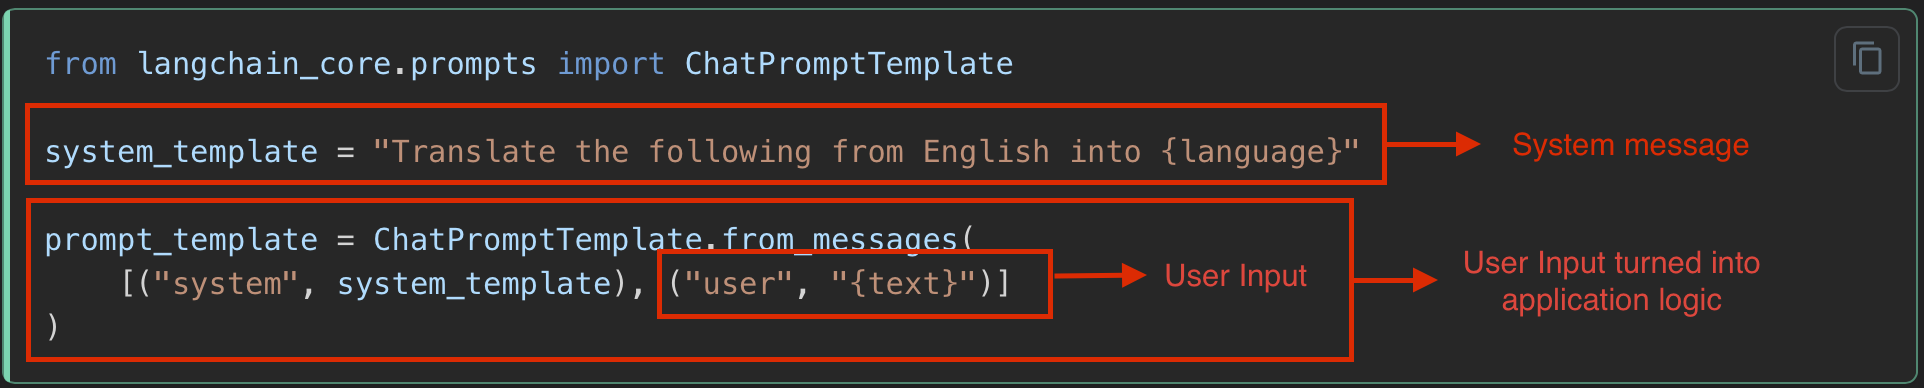
- Prompt templates taken in a raw user input and return a prompt, that can be passed to the model

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

system_message = "Translate the following from English to {language}"

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_message), ("user", "{text}")]
)

In [ ]:
prompt = prompt_template.invoke({"language": "Hindi", "text": "Hey!"})
prompt

ChatPromptValue(messages=[SystemMessage(content='Translate the following from English to Hindi', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hey!', additional_kwargs={}, response_metadata={})])

In [ ]:
prompt.to_messages()

[SystemMessage(content='Translate the following from English to Hindi', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hey!', additional_kwargs={}, response_metadata={})]

In [ ]:
prompt.to_json()

{'lc': 1,
 'type': 'constructor',
 'id': ['langchain', 'prompts', 'chat', 'ChatPromptValue'],
 'kwargs': {'messages': [SystemMessage(content='Translate the following from English to Hindi', additional_kwargs={}, response_metadata={}),
   HumanMessage(content='Hey!', additional_kwargs={}, response_metadata={})]}}

### Invoke using the formatted propmt

In [ ]:
response = model.invoke(prompt)
print(response.content)

हाय! / नमस्ते!
